In [2]:
import cv2 as cv
import numpy as np

In [3]:
avg_kernel = np.ones((3,3), dtype=np.float32)
avg_kernel /= 9
avg_kernel

array([[0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111]], dtype=float32)

In [4]:
from Datasets import Datasets

In [10]:
ac_dataset = Datasets.datasets()["AcMüDüHo"]
train = ac_dataset[0].images

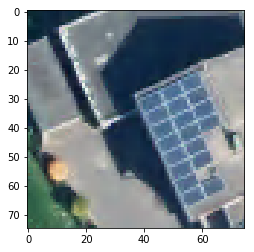

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(train[1][:,:,::-1])

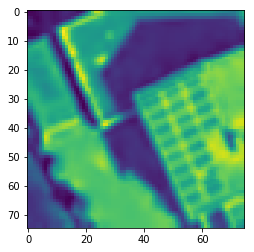

In [22]:
orig = train[1]
dest = cv.filter2D(orig, -1, avg_kernel)
plt.imshow(dest[:,:,0])

In [101]:
def avg_image(image):
    avg_kernel = np.ones((3,3), dtype=np.float32)
    avg_kernel /= 9
    return cv.filter2D(orig, -1, avg_kernel)

In [23]:
orig.shape, dest.shape

((75, 75, 3), (75, 75, 3))

In [150]:
def window_locations(r=2):
    x = [-r, 0, r]
    y = [-r, 0, r]
    mask = np.zeros((1+2*r,1+2*r))
    
    for xc in x:
        for yc in y:
            mask[r + yc, r + xc] = 1.0
    return np.tile(mask,(3,1,1)).T
    
window_mask = window_locations()
window_mask

array([[[1., 1., 1.],
        [0., 0., 0.],
        [1., 1., 1.],
        [0., 0., 0.],
        [1., 1., 1.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[1., 1., 1.],
        [0., 0., 0.],
        [1., 1., 1.],
        [0., 0., 0.],
        [1., 1., 1.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[1., 1., 1.],
        [0., 0., 0.],
        [1., 1., 1.],
        [0., 0., 0.],
        [1., 1., 1.]]])

In [151]:
window_locations(4)

array([[[1., 1., 1.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [1., 1., 1.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [1., 1., 1.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[1., 1., 1.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [1., 1., 1.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [1., 1., 1.]],



In [49]:
a = np.array([[1,2,3,4,5],
             [6,7,8,9,10],
             [11,12,13,14,15],
             [16,17,18,19,20],
             [21,22,23,24,25]])
a * window_mask

array([[ 1.,  0.,  3.,  0.,  5.],
       [ 0.,  0.,  0.,  0.,  0.],
       [11.,  0., 13.,  0., 15.],
       [ 0.,  0.,  0.,  0.,  0.],
       [21.,  0., 23.,  0., 25.]])

In [152]:
def extract_features(image, r=2):
    #grab the spatial dimensions of the image, along with
    # the spatial dimensions of the kernel
    (iH, iW) = image.shape[:2]
    
    kernel = window_locations(r)
    (kH, kW) = kernel.shape[:2]

    # allocate memory for the output image, taking care to
    # "pad" the borders of the input image so the spatial
    # size (i.e., width and height) are not reduced
    pad = (kW - 1) // 2
    image = cv.copyMakeBorder(image, pad, pad, pad, pad,
        cv.BORDER_REPLICATE)
    output = np.zeros((iH, iW, 27), dtype="float32")
    # loop over the input image, "sliding" the kernel across
    # each (x, y)-coordinate from left-to-right and top to
    # bottom
    for y in np.arange(pad, iH + pad):
        for x in np.arange(pad, iW + pad):
            # extract the ROI of the image by extracting the
            # *center* region of the current (x, y)-coordinates
            # dimensions
            roi = image[y - pad:y + pad + 1, x - pad:x + pad + 1]

            # perform the actual selection by taking the
            # element-wise multiplicate between the ROI and
            # the kernel
            k = (roi * kernel)

            # store the convolved value in the output (x,y)-
            # coordinate of the output image
            output[y - pad, x - pad, :] = k[np.nonzero(kernel)]
    
    # return the output image
    return output

In [153]:
avg_output = extract_features(dest)
avg_output.shape

(75, 75, 27)

In [102]:
average = dest
x2_min_avg = (orig - average) * (orig - average);

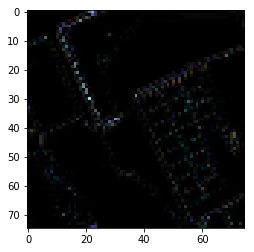

In [103]:
def normalize_image(image):
    return (image - image.min()) / (image.max() - image.min())

#plot the normalized matrix
x2_norm = normalize_image(x2_min_avg)
x2_norm.min(), x2_norm.max()
plt.imshow(x2_norm)

In [104]:
from scipy import ndimage

avg_kernel_3d = np.ones((3, 3, 3), dtype=np.float32)
avg_kernel_3d /= 9

x2_sum_avg = ndimage.convolve(x2_min_avg, avg_kernel_3d) 
x2_sum_avg

array([[[4.06397708e-04, 3.08504492e-04, 2.10611277e-04],
        [2.37639620e-04, 1.84221928e-04, 1.30804236e-04],
        [6.91168600e-05, 6.80411150e-05, 6.69653700e-05],
        ...,
        [7.85562556e-03, 1.35009203e-02, 1.91462151e-02],
        [1.12817162e-02, 1.41307694e-02, 1.69798227e-02],
        [1.64137100e-02, 1.74871396e-02, 1.85605693e-02]],

       [[8.05533951e-04, 6.80847888e-04, 5.56161824e-04],
        [4.95382281e-04, 4.26534301e-04, 3.57686322e-04],
        [1.27375457e-04, 1.18433257e-04, 1.09491057e-04],
        ...,
        [6.27965293e-03, 9.64499871e-03, 1.30103445e-02],
        [8.52124489e-03, 1.07222269e-02, 1.29232088e-02],
        [1.01968583e-02, 1.12275268e-02, 1.22581952e-02]],

       [[4.05913767e-03, 3.63488908e-03, 3.21064049e-03],
        [2.45496058e-03, 2.19116661e-03, 1.92737263e-03],
        [5.06879782e-04, 4.39544473e-04, 3.72209164e-04],
        ...,
        [4.98734200e-03, 6.45022589e-03, 7.91310977e-03],
        [8.43044659e-03, 1.07

In [107]:
std_image = np.sqrt(x2_sum_avg)
std_image
#plt.imshow(normalize_image(std_image))

array([[[0.02015931, 0.0175643 , 0.01451245],
        [0.01541556, 0.01357284, 0.01143697],
        [0.00831366, 0.0082487 , 0.00818324],
        ...,
        [0.08863197, 0.11619346, 0.13836985],
        [0.10621542, 0.11887291, 0.13030665],
        [0.128116  , 0.13223895, 0.13623718]],

       [[0.02838193, 0.02609306, 0.02358308],
        [0.02225718, 0.02065271, 0.0189126 ],
        [0.01128607, 0.0108827 , 0.0104638 ],
        ...,
        [0.07924426, 0.09820895, 0.1140629 ],
        [0.09231059, 0.10354819, 0.11368029],
        [0.10097949, 0.10596002, 0.11071673]],

       [[0.06371136, 0.06029004, 0.05666251],
        [0.04954756, 0.0468099 , 0.04390185],
        [0.02251399, 0.02096532, 0.01929272],
        ...,
        [0.07062112, 0.0803133 , 0.08895566],
        [0.09181746, 0.10384111, 0.11461023],
        [0.09458987, 0.10475681, 0.11402076]],

       ...,

       [[0.0560247 , 0.05534797, 0.05466286],
        [0.05286456, 0.05237037, 0.05187148],
        [0.04879207, 0

In [108]:
def std_image(image):
    average = avg_image(image)
    x2_min_avg = (image - average) * (image - average);
    avg_kernel_3d = np.ones((3, 3, 3), dtype=np.float32)
    avg_kernel_3d /= 9
    conv_image = ndimage.convolve(x2_min_avg, avg_kernel_3d) 
    return np.sqrt(conv_image)

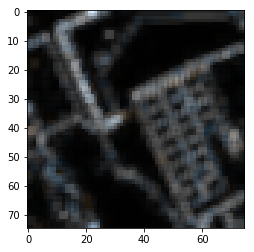

In [109]:
std = std_image(orig)
plt.imshow(normalize_image(std))

In [122]:
std_output = extract_features(std)
std_output.shape

(75, 75, 27)

In [130]:
features = np.concatenate((avg_output, std_output), axis=2)
features.shape

(75, 75, 54)

In [154]:
def get_features(image):
    avg = avg_image(image)
    std = std_image(image)
    
    avg_output2 = extract_features(avg)
    std_output2 = extract_features(std)
    
    avg_output4 = extract_features(avg, 4)
    std_output4 = extract_features(std, 4)
    return np.concatenate((avg_output2, std_output2, avg_output4, std_output4), axis=2)

In [161]:
def get_features_for(images):
    feature_list = []
    for image in images:
        feature_list.append(get_features(image))
    return np.array(feature_list)
X = get_features_for(ac_dataset[0].images)
X.shape

(3357, 75, 75, 108)

In [143]:
y = ac_dataset[0].labels
y.shape

(3357,)

In [156]:
Xf = X.reshape(3357, 75*75*54*2)

In [157]:
from sklearn.ensemble import RandomForestClassifier


clf = RandomForestClassifier()
clf.fit(Xf, y)

/home/tim/.virtualenvs/cv/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [158]:
from sklearn.metrics import classification_report, confusion_matrix


predictions = clf.predict(Xf)
print(classification_report(y, predictions))

              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99      1685
         1.0       1.00      0.98      0.99      1672

   micro avg       0.99      0.99      0.99      3357
   macro avg       0.99      0.99      0.99      3357
weighted avg       0.99      0.99      0.99      3357



In [159]:
confusion_matrix(y, predictions)

array([[1680,    5],
       [  37, 1635]])

In [169]:
test_images = ac_dataset[1].images
y_test = ac_dataset[1].labels

In [162]:
X_test = get_features_for(test_images)

In [167]:
Xf_test = X_test.reshape(374, 75*75*54*2)
Xf_test.shape

(374, 607500)

In [170]:
predictions_test = clf.predict(Xf_test)
print(classification_report(y_test, predictions_test))

              precision    recall  f1-score   support

         0.0       0.68      0.78      0.73       192
         1.0       0.73      0.62      0.67       182

   micro avg       0.70      0.70      0.70       374
   macro avg       0.70      0.70      0.70       374
weighted avg       0.70      0.70      0.70       374



In [171]:
confusion_matrix(y_test, predictions_test)

array([[150,  42],
       [ 70, 112]])